# AML-2203 Advanced Python AI and ML Tools

# Assignment#2:

Task: Using PANDAS for data analysis

* Student Name: Chaw Su Su Thinn

* Student ID: 0916347

# SF Salaries Exercise 

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

**Import pandas as pd**

In [101]:
import pandas as pd

**Read Salaries.csv as a dataframe called sal.**

In [102]:
file_path = "../datasets/Salaries347.csv"

sal347 = pd.read_csv(file_path)

**Check the head of the DataFrame.**

In [103]:
print(sal347.head())

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisc

**Use the .info() method to find out how many entries there are.**

In [104]:
sal347.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**Observations from Dataset**

This dataset contains salary records of public employees in San Francisco. Here's what each column means:

1. Id – Unique number for each employee record, assigned in order.
2. EmployeeName – Full name of the employee. Looks unique, but I’ll check for duplicates later.
3. JobTitle – The specific job title or role of the employee.
4. BasePay – Base salary (some values are missing).
5. OvertimePay – Extra pay from overtime work.
6. OtherPay – Additional payments like bonuses or allowances.
7. Benefits – Value of benefits provided (lots of missing values here).
8. TotalPay – Sum of BasePay, OvertimePay, and OtherPay.
9. TotalPayBenefits – TotalPay plus Benefits.
10. Year – Year the salary was recorded.
11. Notes – Completely empty column with 0 non-null.
12. Agency – Refers to “San Francisco” for all records.
13. Status – Also completely empty (0 non-null).

There are 148,654 records and 13 columns. 

Most of the key columns are complete, but some like `BasePay`, `OvertimePay`, and especially `Benefits` have missing values. 

`Notes` and `Status` are fully null, so I will drop these columns later.

In [105]:
# Check null values
print(sal347.isnull().sum())

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


**Analysis from missing values**

* `BasePay` has 609 missing values. I’ll check those later to decide whether to fill with 0 or drop them.

* `OvertimePay` and `OtherPay` are missing in 4 rows each. I’ll look into those rows to see the clear picture.

* `Benefits` is missing in over 36,000 rows. Not sure yet if that means no benefits or just not recorded. Will figure that out later.

* `Notes` and `Status` are completely empty. I will drop these since it is 100% empty.

* The rest of the key fields like `Id`, `EmployeeName`, `JobTitle`, `TotalPay`, `TotalPayBenefits`, `Year`, and `Agency` don’t have any missing values, so they’re good for now.

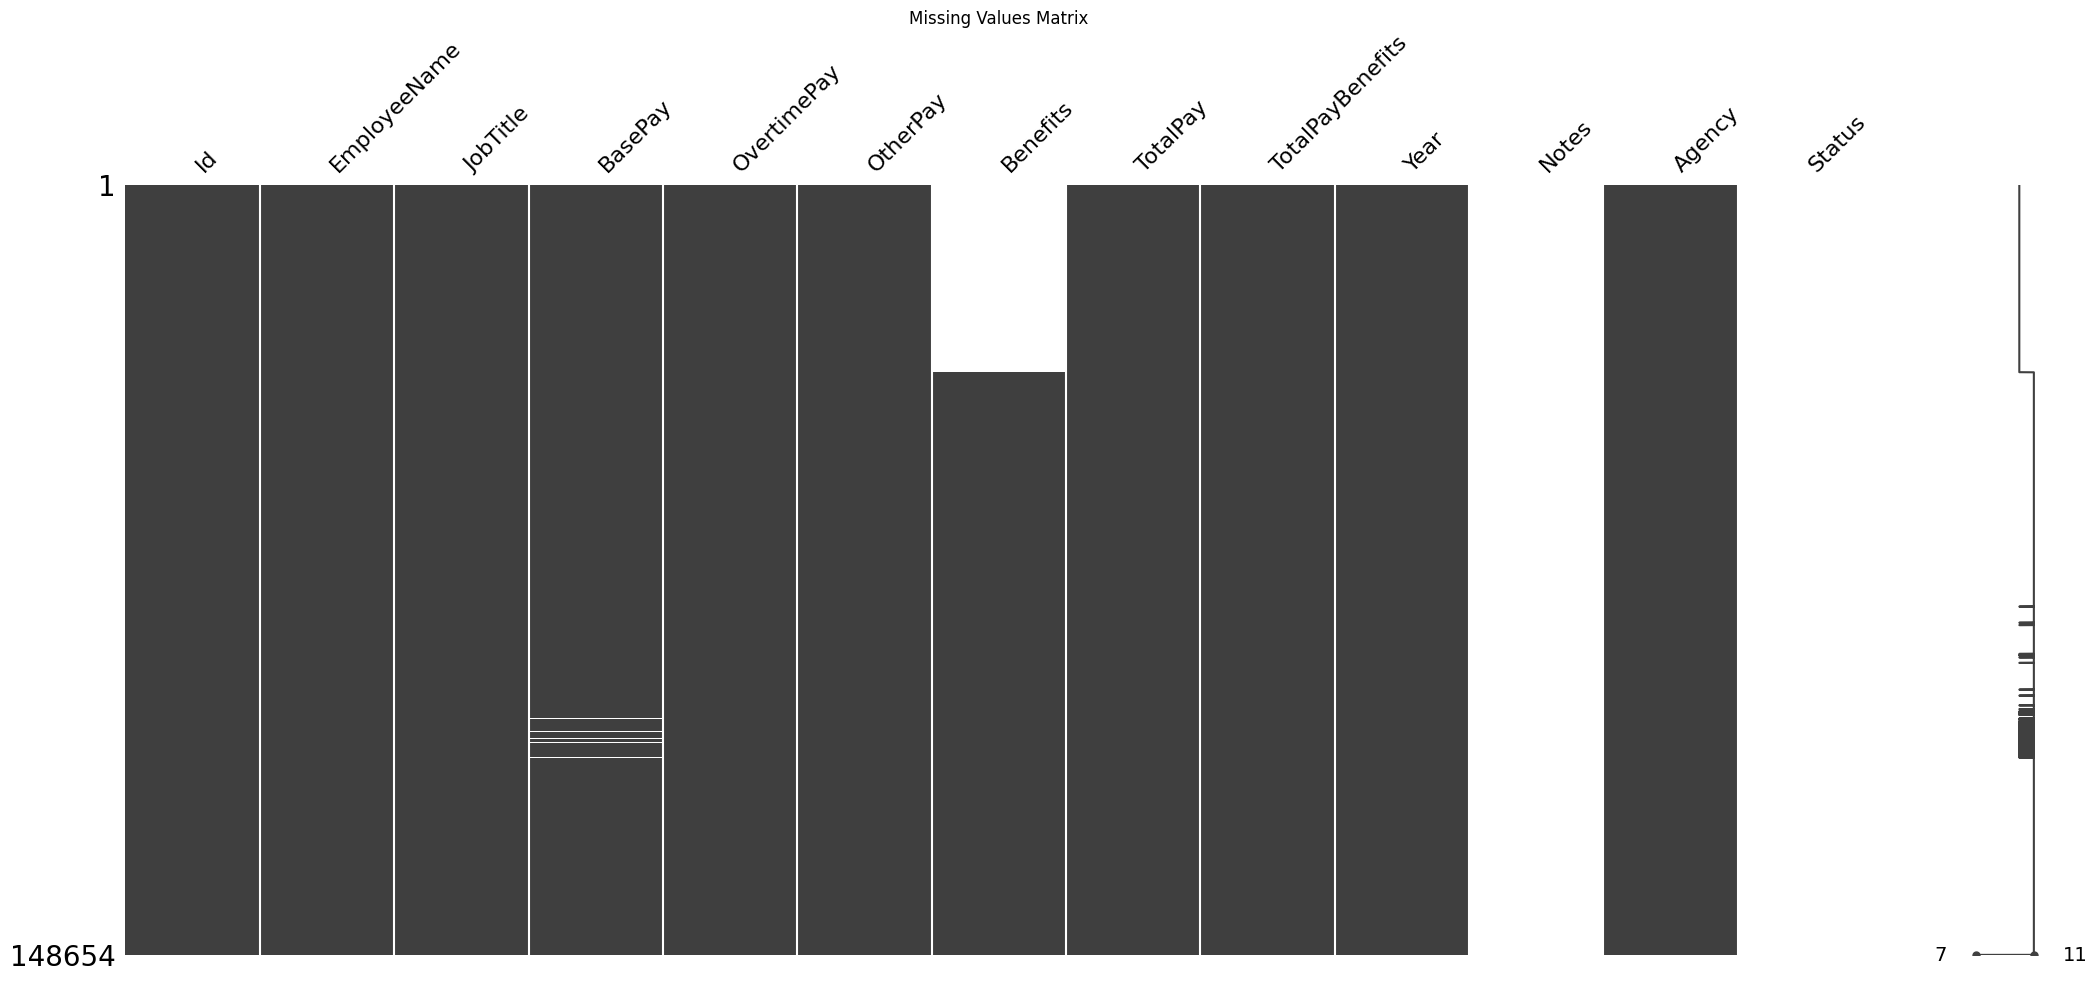

In [106]:
import missingno as msno
import matplotlib.pyplot as plt

# Print missing value matrix
msno.matrix(sal347)
plt.title('Missing Values Matrix')
plt.show()

**Analysis from missing value matrix**

* I confirmed the missing value patterns using the missing value matrix. 

* It clearly shows gaps in `BasePay`, `OvertimePay`, `OtherPay`, and especially `Benefits`, just like in the `.isna().sum()` output.

* `Notes` and `Status` are completely blank overall.

* The rest of the fields are fully populated, but I’ll still review the categorical columns to check for any unknown values.

In [107]:
# Check summary statistics
print(sal347.describe())

                  Id        BasePay    OvertimePay       OtherPay  \
count  148654.000000  148045.000000  148650.000000  148650.000000   
mean    74327.500000   66325.448840    5066.059886    3648.767297   
std     42912.857795   42764.635495   11454.380559    8056.601866   
min         1.000000    -166.010000      -0.010000   -7058.590000   
25%     37164.250000   33588.200000       0.000000       0.000000   
50%     74327.500000   65007.450000       0.000000     811.270000   
75%    111490.750000   94691.050000    4658.175000    4236.065000   
max    148654.000000  319275.010000  245131.880000  400184.250000   

            Benefits       TotalPay  TotalPayBenefits           Year  Notes  \
count  112491.000000  148654.000000     148654.000000  148654.000000    0.0   
mean    25007.893151   74768.321972      93692.554811    2012.522643    NaN   
std     15402.215858   50517.005274      62793.533483       1.117538    NaN   
min       -33.890000    -618.130000       -618.130000    2011.

**Analysis on summary statistics**

* `BasePay`, `OvertimePay`, `OtherPay`, and `Benefits` all have some negative values, which shouldn’t happen. I’ll check those rows later to see if they’re errors or adjustments.

* `Benefits` only has 112,491 non-null rows as confrimed earlier.

* `TotalPay` and `TotalPayBenefits` have  no missing values but they also have negative values.

* `Notes` and `Status` are completely empty as confirmed earlier.

* `Year` has no missing values. It ranges from 2011 to 2014, which confirms the time span of the dataset.

**Approach**

* I dropped the Notes and Status columns since they were completely empty and not useful for the analysis.

* Then, I defined all the pay-related columns `BasePay`, `OvertimePay`, `OtherPay`, `Benefits` and filled their missing values with.

* I verified the changes to make sure all key columns are now free of nulls.

In [108]:
# Drop columns with null values
cols_to_drop = ["Notes", "Status"]

# Drop the previous columns from original df
sal347 = sal347.drop(columns=cols_to_drop)

# Verify the columns
print(sal347.columns)

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')


In [109]:
# Define pay columns
pay_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']

# Fill null values with 0 for each of those columns
sal347[pay_cols] = sal347[pay_cols].fillna(0)

# Verify null values
print(sal347.isnull().sum())

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


**Approach**

* Now that there are no null values in any columns, I checked the unique values in the categorical columns.

* I used a loop to print both the unique values and their counts for `EmployeeName`, `JobTitle`, and `Agency`.

In [110]:
# Print unique values of categorical columns
cat_cols = ["EmployeeName", "JobTitle", "Agency"]

for col in cat_cols:
    print(f"Unique values in '{col}': {sal347[col].unique()}")
    print(f"Unique values count: {sal347[col].nunique()}")
    print()

Unique values in 'EmployeeName': ['NATHANIEL FORD' 'GARY JIMENEZ' 'ALBERT PARDINI' ... 'Charlene D Mccully'
 'Not provided' 'Joe Lopez']
Unique values count: 110811

Unique values in 'JobTitle': ['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Conversion' 'Cashier 3' 'Not provided']
Unique values count: 2159

Unique values in 'Agency': ['San Francisco']
Unique values count: 1



**Analysis from categorical columns**

* `EmployeeName` has over 110k unique values, which makes sense since most records are for different people. I also noticed `"Not provided"` in the list, so I’ll look into those rows later.

* `JobTitle` has 2159 unique values. There’s a mix of all caps and title case, and also `"Not provided"` shows up here too.

* `Agency` only has one value: `"San Francisco"`.

**Approach**

* I filtered the dataset to check for any rows where `EmployeeName` or `JobTitle` is `"Not provided"`.

* I found a few rows where both of these fields are `"Not provided"` and all pay-related columns are 0.

* These records also have no useful info in any other columns other than Employee ID.

* Since I already had `rows_with_not_provided`, I just dropped those rows using their index with `.drop()`.

In [111]:
# Check rows with values that are not provided
rows_with_not_provided = sal347[sal347.isin(['Not provided']).any(axis=1)]
print(rows_with_not_provided)

            Id  EmployeeName      JobTitle  BasePay  OvertimePay  OtherPay  \
148646  148647  Not provided  Not provided      0.0          0.0       0.0   
148650  148651  Not provided  Not provided      0.0          0.0       0.0   
148651  148652  Not provided  Not provided      0.0          0.0       0.0   
148652  148653  Not provided  Not provided      0.0          0.0       0.0   

        Benefits  TotalPay  TotalPayBenefits  Year         Agency  
148646       0.0       0.0               0.0  2014  San Francisco  
148650       0.0       0.0               0.0  2014  San Francisco  
148651       0.0       0.0               0.0  2014  San Francisco  
148652       0.0       0.0               0.0  2014  San Francisco  


In [112]:
# Drop those rows from df
sal347 = sal347.drop(index=rows_with_not_provided.index)

**Analysis**

* These rows don’t carry any meaningful data since all compensation fields are 0 and both `EmployeeName` and `JobTitle` are `"Not provided"`.

* Since there’s nothing useful in these rows, I plan to drop them from the dataset. They won’t contribute to any insights or analysis.

**What is the average BasePay ?**

**Approach**

* I calculated the average `BasePay` using the `.mean()` method on `sal347['BasePay']`.

* Then, I double-checked the result by extracting the mean value from `.describe()`.

In [113]:
# Calculate average BasePay
average_basepay = sal347['BasePay'].mean()
print(f"Average BasePay: ${average_basepay:,.2f}")

Average BasePay: $66,055.51


In [114]:
# Double-confirmed by using .describe()
print(sal347['BasePay'].describe()['mean'])

66055.50671772621


**Answer**

* The average `BasePay` is **$66,055.51**.

* This value matches with the mean returned by `.describe()` summary statistics.

**What is the highest amount of OvertimePay in the dataset?**

**Approach**

* To get the highest amount of `OvertimePay`, I used the `.max()` method on `sal347['OvertimePay']`.

* Then I printed the result using f-string formatting `:,.2f` to show the value with commas and two decimal places.

* I also double-checked the result by using `.describe()` to confirm that the max value matched.

In [115]:
# Get highest amount of OvertimePay in the dataset
highest_overtimepay = sal347['OvertimePay'].max()
print(f"Highest amount of OvertimePay: ${highest_overtimepay:,.2f}")

Highest amount of OvertimePay: $245,131.88


In [116]:
# Double-confirmed by using .describe()
print(sal347['OvertimePay'].describe()['max'])

245131.88


**Answer**

* The highest amount of `OvertimePay` in the dataset is **\$245,131.88**.

* I confirmed this by using both the `.max()` function and the max value from `.describe()`.

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

**Approach**

* I declared the employee name as a variable.

* I filtered the DataFrame using `.loc[]` to select the row where `EmployeeName` matches the selected name.

* Then I accessed the `JobTitle` value using `.values[0]` and printed it with f-string formatting.

In [117]:
# Declare the employee name
selected_employee = 'JOSEPH DRISCOLL'

# Select the record of the employee
selected_record = sal347.loc[sal347['EmployeeName'] == selected_employee]
print(selected_record)

    Id     EmployeeName                   JobTitle    BasePay  OvertimePay  \
24  25  JOSEPH DRISCOLL  CAPTAIN, FIRE SUPPRESSION  140546.86     97868.77   

    OtherPay  Benefits   TotalPay  TotalPayBenefits  Year         Agency  
24  31909.28       0.0  270324.91         270324.91  2011  San Francisco  


In [118]:
# Extract job title and print the result
job_title = selected_record['JobTitle'].values[0]
print(f"Job title of {selected_employee} is {job_title}")

Job title of JOSEPH DRISCOLL is CAPTAIN, FIRE SUPPRESSION


**Answer**

* The job title of selected employee JOSEPH DRISCOLL is CAPTAIN, FIRE SUPPRESSION.

**How much does JOSEPH DRISCOLL make (including benefits)?**

**Approach**

* Since I had already selected the record of JOSEPH DRISCOLL using `.loc[]` in previous step, I reused that `selected_record` to access the `TotalPayBenefits` value.

* Then, I used f-string formatting with `:,.2f` to display the result with commas and two decimal places.

In [119]:
# Extract total pay including benefits and print the result
total_pay = selected_record['TotalPayBenefits'].values[0]
print(f"Total Pay Benefits of {selected_employee} is ${total_pay:,.2f}.")

Total Pay Benefits of JOSEPH DRISCOLL is $270,324.91.


**Answer**

* The total pay including benefits for JOSEPH DRISCOLL is **$270,324.91**.

**What is the name of highest paid person (including benefits)?**

**Approach**

* I used `.loc[]` with `.idxmax()` on the `TotalPayBenefits` column to find the index of the highest paid person.

* Then I retrieved the `EmployeeName` from that row.

In [120]:
# Get the index of the highest TotalPayBenefits
highest_paid_index = sal347['TotalPayBenefits'].idxmax()

# Extract the employee name from selected row
highest_paid_name = sal347.loc[highest_paid_index, 'EmployeeName']
print(f"The highest paid person (including benefits) is {highest_paid_name}.")

The highest paid person (including benefits) is NATHANIEL FORD.


**Answer**

* Based on the result, the highest paid person (including benefits) is **NATHANIEL FORD**.

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

**Approach**

* I used `.idxmin()` on the `TotalPayBenefits` column to get the index of the lowest paid person.

* Then I used `.loc[]` to get the `EmployeeName` and check the full row to verify if there is something strange about the value since I noticed that we have negative values while I was viewing the summary stats earlier.

In [121]:
# Get index of the lowest paid person
lowest_paid_index = sal347['TotalPayBenefits'].idxmin()

# Get the full row
lowest_paid_row = sal347.loc[lowest_paid_index]
print(lowest_paid_row)

Id                                      148654
EmployeeName                         Joe Lopez
JobTitle            Counselor, Log Cabin Ranch
BasePay                                    0.0
OvertimePay                                0.0
OtherPay                               -618.13
Benefits                                   0.0
TotalPay                               -618.13
TotalPayBenefits                       -618.13
Year                                      2014
Agency                           San Francisco
Name: 148653, dtype: object


**Answer**

* Based on the results, the lowest paid person (including benefits) is **Joe Lopez**.

* What’s strange is that their `TotalPayBenefits` value is **negative (-$618.13)**, which doesn’t make sense. It could be a data entry error since the other pay columns like `BasePay, OvertimePay, Benefits` are 0.

**What was the average (mean) BasePay of all employees per year? (2011-2014)?**

**Approach**

* I grouped the data by `Year` and calculated the average of `BasePay` using `.groupby()` and `.mean()`.

* This gives me the mean BasePay for each year from 2011 to 2014.

In [122]:
# Get mean of BasePay by year
average_basepay_per_year = sal347.groupby('Year')['BasePay'].mean()
print(average_basepay_per_year)

Year
2011    63595.956517
2012    65436.406857
2013    68509.832156
2014    66564.421924
Name: BasePay, dtype: float64


In [123]:
# Format and print the values in 2 decimals
for year, avg in average_basepay_per_year.items():
    print(f"{year}: ${avg:,.2f}")

2011: $63,595.96
2012: $65,436.41
2013: $68,509.83
2014: $66,564.42


**Answer**

* Based on the result, the average `BasePay` per year is:
    ```
    Year
    2011: $63,595.96
    2012: $65,436.41
    2013: $68,509.83
    2014: $66,564.42
    ```

**How many unique job titles are there?**

**Approach**

* I used `.nunique()` on the `JobTitle` column to count how many unique job titles are in the dataset.

In [124]:
# Get unique values of jobtitle
unique_job_titles = sal347['JobTitle'].nunique()
print(f"Number of unique job titles: {unique_job_titles}")

Number of unique job titles: 2158


**Answer**

* As I observed earlier, there are 2,158 unique job titles in the dataset, since I removed the records that has empty details with "Not Provided".

**What are the top 5 most common jobs?**

**Approach**

* I used `.value_counts()` on the `JobTitle` column to count how many times each job appears.

* Then I used `.head(5)` to get the top 5 most common job titles.

In [125]:
# Get top 5 jobs from sal347 and their counts
top_5_jobs = sal347['JobTitle'].value_counts().head(5)
print(top_5_jobs)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64


**Answer**

* Based on the result, the top 5 most common job titles in the dataset are:

    ```
    Transit Operator                7036
    Special Nurse                   4389
    Registered Nurse                3736
    Public Svc Aide-Public Works    2518
    Police Officer 3                2421
    ```

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

**Approach**

* First, I filtered the dataset for rows where `Year == 2013`.

* Then I used `.value_counts()` on the `JobTitle` column to count how many times each job appeared.

* Finally, I checked how many job titles had a count of exactly 1.

In [126]:
# Filter dataset for rows where Year is 2013 and count job title occurrences
job_counts_2013 = sal347[sal347['Year'] == 2013]['JobTitle'].value_counts()

# Count how many job titles appear only once
unique_jobs_2013 = (job_counts_2013 == 1).sum()

# Print the result
print(f"Number of job titles with only one person in 2013: {unique_jobs_2013}")

Number of job titles with only one person in 2013: 202


**Answer**

* Based on the result, there are 202 job titles that were held by only one person in 2013.

**How many people have the word Chief in their job title? (This is pretty tricky)**

**Approach**

* Based on what I observed earlier, `JobTitle` values are not consistent since some are in all caps, some in title case, and some mixed.

* So to find how many people have `"Chief"` in their job title, I used `.str.contains('chief', case=False, na=False)` to catch all case variations.

* This makes sure I don’t miss anything like `"CHIEF OF POLICE"` or `"chief tech officer"`.

In [127]:
chief_count = sal347['JobTitle'].str.contains('chief', case=False, na=False).sum()
print(f"Number of people with 'Chief' in their job title: {chief_count}")

Number of people with 'Chief' in their job title: 627


**Answer**

* There are **627** people with `Chief` in their job title.

* This includes all variations like `CHIEF`, `Chief`, and `chief`, since I used a case-insensitive match.

**Is there a correlation between length of the Job Title string and Salary?**

**Approach**

* I created a new column to store the length of each job title using `.str.len()`.

* Then I checked the correlation between job title length`TitleLength` and `TotalPayBenefits` using `.corr()`.

In [128]:
# Create a column for job title length
sal347['TitleLength'] = sal347['JobTitle'].str.len()

In [129]:
# Check the correlation with salary
correlation = sal347['TitleLength'].corr(sal347['TotalPayBenefits'])
print(f"Correlation: {correlation}")

Correlation: -0.03691962394389061


**Answer**

* The correlation between job title length and total pay including benefits is -0.037.

* This shows there's no real correlation. 

* So, I concluded that the length of the job title doesn’t impact salary in any meaningful way.

End Of the Assignment !